## GLO Demo stability test 2017-12-01
Sun1: every second 19:49:31 - 19:49:53 UTC

Sun2: every second 19:50:26 - 19:56:45 UTC

Sun3: every second 20:22:36 - 20:44:03 UTC

Sun4: every second 20:51:58 - 21:05:08 UTC

Sun5: every second 21:11:00 - 21:33:49 UTC

Day &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; Sunrise &ensp;&ensp;&ensp; Sunset &ensp;&ensp;&ensp;&ensp;&ensp; Solar Noon

Fri, Dec 1 &ensp;&ensp;7:17:49 am &ensp; 5:04:24 pm &ensp; 12:11:06 pm	


In [1]:
%cd ..

C:\git_repos\GLO


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from proc_img.load_roi1_data import load_roi1_data
from proc_img.load_l0a_data import load_l0a_data
from proc_img.load_sun_sensor_data import load_sun_sensor_data
from tools.plot_roi import plot_roi,plot_roi_all,plot_roi_nds
import os
from glob import glob
from natsort import natsorted

In [4]:
#set plotting parmeters
mpl.rcParams['lines.markersize'] = 3
mpl.rcParams['figure.figsize'] = (15, 15)
mpl.rcParams['font.size']=22
#fig.set_tight_layout(False)

In [5]:
#load l0a data 
date = '20171201'
data = load_l0a_data(os.getcwd()+'/data/'+date+'/data_0a_20171201.txt')

In [6]:
#load all roi1 data into a dict
def load_roi():
    roi1={}
    loc = os.getcwd()+'/data/'+date+'/'
    loc_all = glob(loc+'*roi1_*')
    loc_all = natsorted(loc_all)
    for i in range(len(loc_all)):
      loc_all[i].replace('\\','/')
      roi1['ch'+str(i+1)] = load_roi1_data(loc_all[i])
    return roi1

## Plot raw signal for HDO gas and HDO vac channels

(0, 1200)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


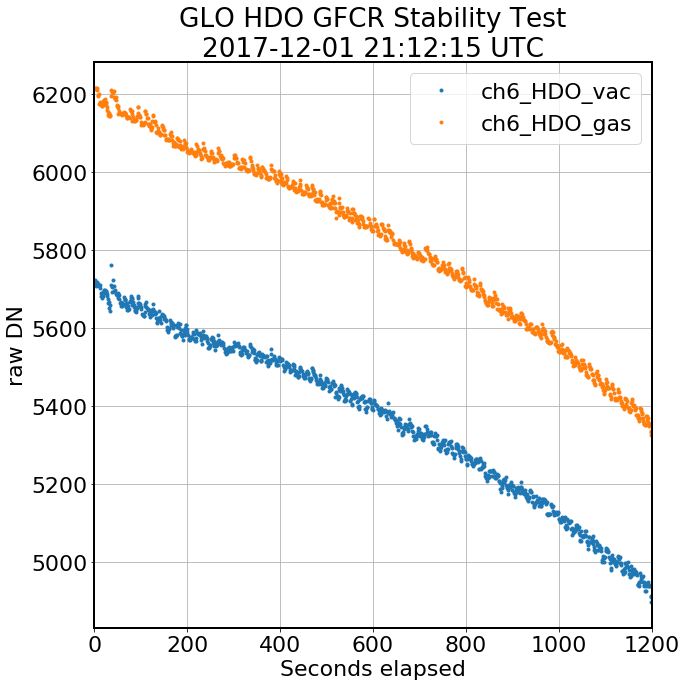

In [9]:
mpl.rcParams['lines.markersize'] = 3
mpl.rcParams['figure.figsize'] = (10, 10)
t_start = 7000
t_stop = 8200

roi1 = load_roi()
roi_df = roi1['ch3']
roi1_row = 16
roi_df['elapsed'] = roi_df.index.to_datetime() - roi_df.index[0]
roi_df.elapsed = roi_df.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df.elapsed > t_start) & (roi_df.elapsed < t_stop)
roi_df = roi_df.loc[mask,:]
plt.plot(roi_df.elapsed-t_start,roi_df.iloc[:,roi1_row ],'o',label='ch6_HDO_vac')
plt.xlabel('Seconds elapsed')

roi_df = roi1['ch6']
roi1_row = 16
roi_df['elapsed'] = roi_df.index.to_datetime() - roi_df.index[0]
roi_df.elapsed = roi_df.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df.elapsed > t_start) & (roi_df.elapsed < t_stop)
roi_df = roi_df.loc[mask,:]
plt.plot(roi_df.elapsed-t_start,roi_df.iloc[:,roi1_row ],'o',label='ch6_HDO_gas')
plt.xlabel('Seconds elapsed')
plt.ylabel('raw DN')
plt.legend()
plt.title('GLO HDO GFCR Stability Test\n2017-12-01 21:12:15 UTC')
plt.xlim((0,1200))

## Plot difference of raw signal between HDO gas and HDO vac channels

(0, 1200)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


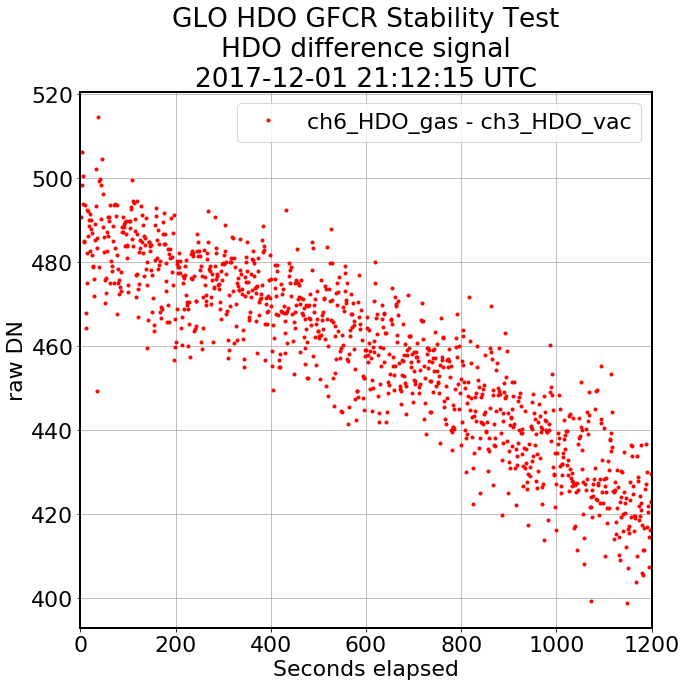

In [21]:
mpl.rcParams['lines.markersize'] = 3
mpl.rcParams['figure.figsize'] = (10, 10)
t_start = 7000
t_stop = 8200

roi1 = load_roi()
roi_df = roi1['ch6']-roi1['ch3']
roi1_row = 16
roi_df['elapsed'] = roi_df.index.to_datetime() - roi_df.index[0]
roi_df.elapsed = roi_df.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df.elapsed > t_start) & (roi_df.elapsed < t_stop)
roi_df = roi_df.loc[mask,:]
plt.plot(roi_df.elapsed-t_start,roi_df.iloc[:,roi1_row ],'o',color='red',label='ch6_HDO_gas - ch3_HDO_vac')
plt.xlabel('Seconds elapsed')
plt.ylabel('raw DN')
plt.legend()
plt.title('GLO HDO GFCR Stability Test\nHDO difference signal\n2017-12-01 21:12:15 UTC')
plt.xlim((0,1200))

## Plot normalized difference signal between HDO gas and HDO vac channels

(0, 1200)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


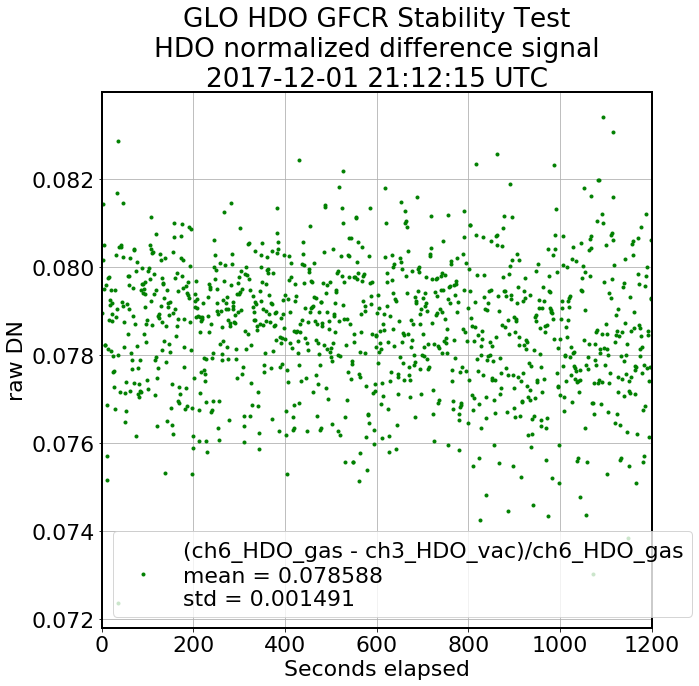

In [22]:
mpl.rcParams['lines.markersize'] = 3
mpl.rcParams['figure.figsize'] = (10, 10)
t_start = 7000
t_stop = 8200

roi1 = load_roi()
roi_df = (roi1['ch6']-roi1['ch3'])/roi1['ch6']
roi1_row = 16
roi_df['elapsed'] = roi_df.index.to_datetime() - roi_df.index[0]
roi_df.elapsed = roi_df.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df.elapsed > t_start) & (roi_df.elapsed < t_stop)
roi_df = roi_df.loc[mask,:]
mean = str(round(roi_df.iloc[:,roi1_row ].mean(),6))
std = str(round(roi_df.iloc[:,roi1_row ].std(),6))
plt.plot(roi_df.elapsed-t_start,roi_df.iloc[:,roi1_row ],'o',color='green',label='(ch6_HDO_gas - ch3_HDO_vac)/ch6_HDO_gas\nmean = '+mean+'\nstd = '+std)
plt.xlabel('Seconds elapsed')
plt.ylabel('raw DN')
plt.legend()
plt.title('GLO HDO GFCR Stability Test\nHDO normalized difference signal\n2017-12-01 21:12:15 UTC')
plt.xlim((0,1200))

In [13]:
#Define function to plot the regions of interest
def plot_roi(roi_df,t_start=None,t_stop=None,roll_win=None,leg=None,roi1_row=[16],stats=False): 
    if leg == None:
        leg=''
    #pdb.set_trace()
    if roll_win != None:
        roi_df = roi_df.rolling(roll_win,center=True).mean()
    if len(roi1_row)>1:
        roi_df = roi_df.iloc[:,roi1_row].mean(axis=1).to_frame()
    roi_df['elapsed'] = roi_df.index.to_datetime() - roi_df.index[0]
    roi_df.elapsed = roi_df.elapsed.astype('timedelta64[ms]').divide(1000.0)
    mask = (roi_df.elapsed > t_start) & (roi_df.elapsed < t_stop)
    roi_df = roi_df.loc[mask,:]

    if stats == True:
        mean = str(round(roi_df.iloc[:,roi1_row[0] ].mean(),6))
        std = str(round(roi_df.iloc[:,roi1_row[0] ].std(),6))
        if len(roi1_row)>1:
            plt.plot(roi_df['elapsed'],roi_df.iloc[:,[0]],'o',label=leg+'\nmean = '+mean+'\nstd = '+std)
        else:
            plt.plot(roi_df['elapsed'],roi_df.iloc[:,roi1_row[0]],'o',label=leg+'\nmean = '+mean+'\nstd = '+std)
    else:
        if len(roi1_row)>1:
            plt.plot(roi_df['elapsed'],roi_df.iloc[:,[0]],'o',label=leg)#\nmean = '+mean+'\nstd = '+std)
        else:
            plt.plot(roi_df['elapsed'],roi_df.iloc[:,roi1_row[0]],'o',label=leg)#\nmean = '+mean+'\nstd = '+std)
    plt.xlabel('Seconds elapsed')
    plt.ylabel('raw DN')
    plt.legend()
    plt.title('GLO HDO GFCR Stability Test\nHDO normalized difference signal\n2017-12-01 21:12:15 UTC')

## Plot raw DN, difference signal, and normalize difference signal of ROI1 (center row 16) for HDO gas and HDO vac channels. Overplot rolling mean of signal with a 15 second rolling average.

Text(0.5,1,'GLO HDO GFCR Stability Test\nHDO normalized difference signal row [16]\n2017-12-01 21:12:15 UTC')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


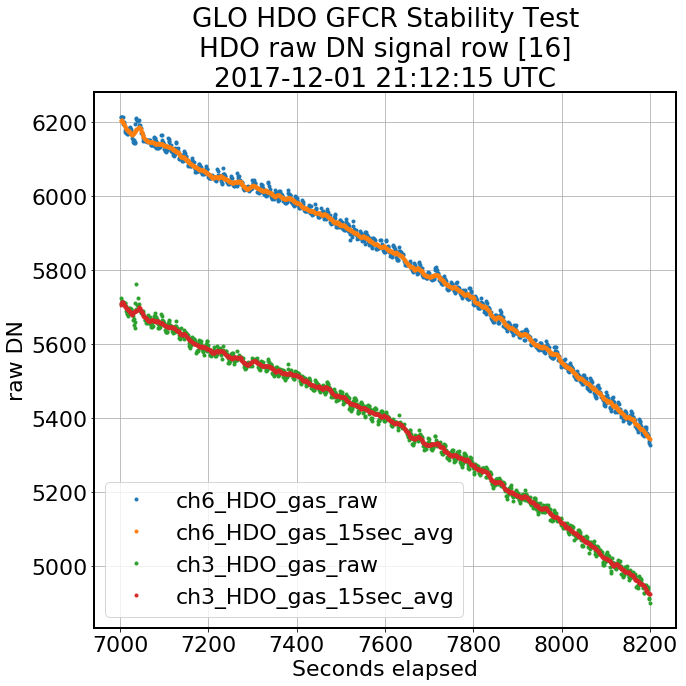

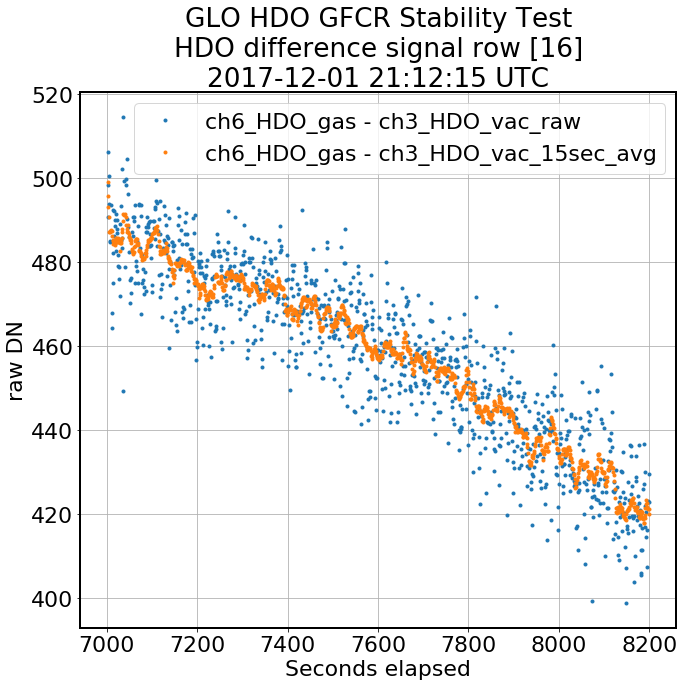

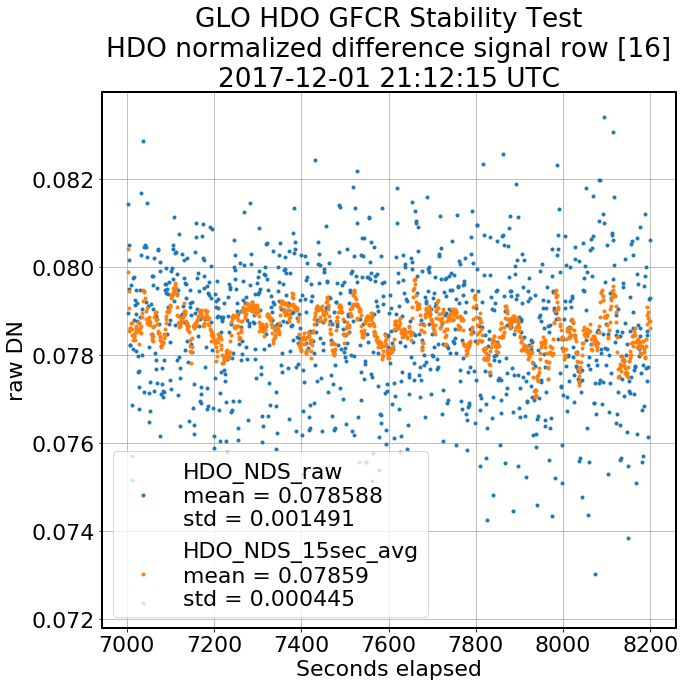

In [14]:
t_start = 7000
t_stop = 8200
roi1 = load_roi()
roi1_row=[16]

plt.figure(1)
plot_roi(roi1['ch6'],t_start,t_stop,leg='ch6_HDO_gas_raw',roi1_row=roi1_row)
plot_roi(roi1['ch6'],t_start,t_stop,roll_win=15,leg='ch6_HDO_gas_15sec_avg',roi1_row=roi1_row)
plot_roi(roi1['ch3'],t_start,t_stop,leg='ch3_HDO_gas_raw',roi1_row=roi1_row)
plot_roi(roi1['ch3'],t_start,t_stop,roll_win=15,leg='ch3_HDO_gas_15sec_avg',roi1_row=roi1_row)
plt.title('GLO HDO GFCR Stability Test\nHDO raw DN signal row '+str(roi1_row[:])+'\n2017-12-01 21:12:15 UTC')

plt.figure(2)
plot_roi(roi1['ch6']-roi1['ch3'],t_start,t_stop,leg='ch6_HDO_gas - ch3_HDO_vac_raw',roi1_row=roi1_row)
plot_roi(roi1['ch6']-roi1['ch3'],t_start,t_stop,roll_win=15,leg='ch6_HDO_gas - ch3_HDO_vac_15sec_avg',roi1_row=roi1_row)
plt.title('GLO HDO GFCR Stability Test\nHDO difference signal row '+str(roi1_row[:])+'\n2017-12-01 21:12:15 UTC')

plt.figure(3)
plot_roi((roi1['ch6']-roi1['ch3'])/(roi1['ch6']),t_start,t_stop,leg='HDO_NDS_raw',stats=True,roi1_row=roi1_row)
plot_roi((roi1['ch6']-roi1['ch3'])/(roi1['ch6']),t_start,t_stop,roll_win=15,leg='HDO_NDS_15sec_avg',stats=True,roi1_row=roi1_row)
plt.title('GLO HDO GFCR Stability Test\nHDO normalized difference signal row '+str(roi1_row[:])+'\n2017-12-01 21:12:15 UTC')

## Plot raw DN, difference, and NDS for ALL rows of ROI 1 (Raw DN signal) for HDO vac and gas channel. 

Text(0.5,1,'GLO HDO GFCR Stability Test\nHDO normalized difference signal all rows ')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


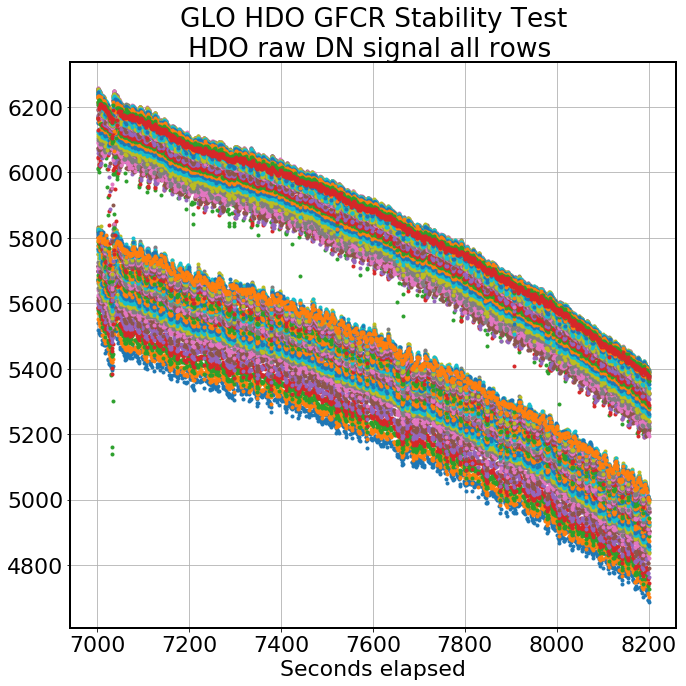

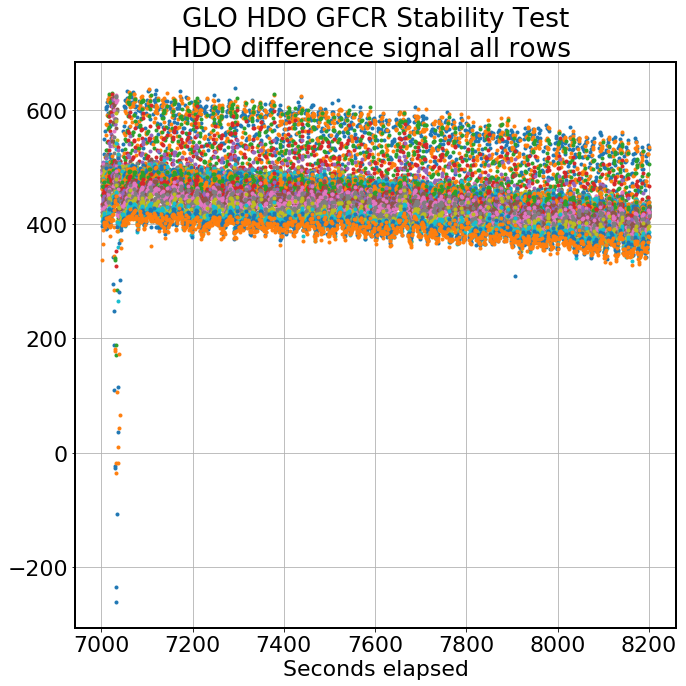

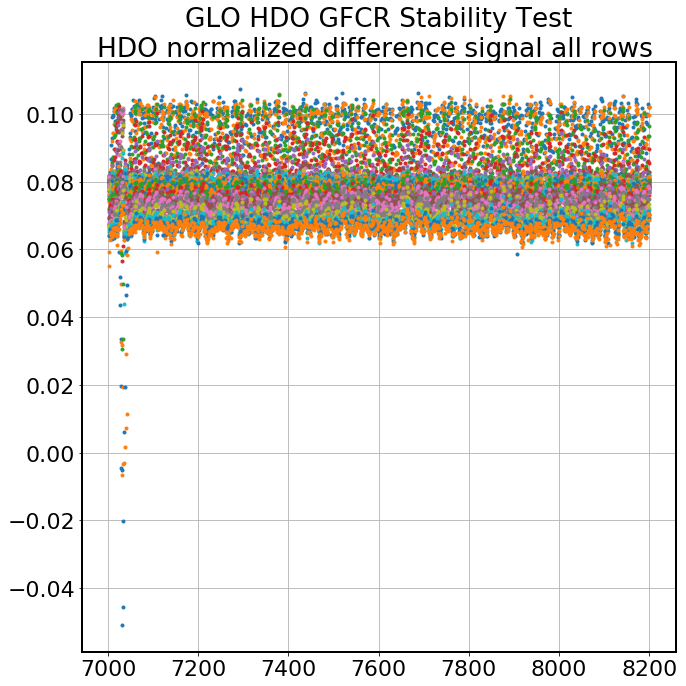

In [43]:
t_start = 7000
t_stop = 8200
roi1 = load_roi()

plt.figure(1)
roi_df = roi1['ch3']
roi_df['elapsed'] = roi_df.index.to_datetime() - roi_df.index[0]
roi_df.elapsed = roi_df.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df.elapsed > t_start) & (roi_df.elapsed < t_stop)
roi_df = roi_df.loc[mask,:]
plt.plot(roi_df.elapsed,roi_df.iloc[:,np.arange(32)],'o')
plt.xlabel('Seconds elapsed')

roi_df = roi1['ch6']
roi_df['elapsed'] = roi_df.index.to_datetime() - roi_df.index[0]
roi_df.elapsed = roi_df.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df.elapsed > t_start) & (roi_df.elapsed < t_stop)
roi_df = roi_df.loc[mask,:]
plt.plot(roi_df.elapsed,roi_df.iloc[:,np.arange(32)],'o')
plt.xlabel('Seconds elapsed')
plt.title('GLO HDO GFCR Stability Test\nHDO raw DN signal all rows ')

plt.figure(2)
roi_df_ch3 = roi1['ch3']
roi_df_ch3['elapsed'] = roi_df_ch3.index.to_datetime() - roi_df_ch3.index[0]
roi_df_ch3.elapsed = roi_df_ch3.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df_ch3.elapsed > t_start) & (roi_df_ch3.elapsed < t_stop)
roi_df_ch3 = roi_df_ch3.loc[mask,:]

roi_df_ch6 = roi1['ch6']
roi_df_ch6['elapsed'] = roi_df_ch6.index.to_datetime() - roi_df_ch6.index[0]
roi_df_ch6.elapsed = roi_df_ch6.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df_ch6.elapsed > t_start) & (roi_df_ch6.elapsed < t_stop)
roi_df_ch6 = roi_df_ch6.loc[mask,:]
plt.plot(roi_df_ch3.elapsed,roi_df_ch6.iloc[:,np.arange(32)]-roi_df_ch3.iloc[:,np.arange(32)],'o')
plt.xlabel('Seconds elapsed')
plt.title('GLO HDO GFCR Stability Test\nHDO difference signal all rows ')

plt.figure(3)
plt.plot(roi_df_ch3.elapsed,(roi_df_ch6.iloc[:,np.arange(32)]-roi_df_ch3.iloc[:,np.arange(32)])/roi_df_ch6.iloc[:,np.arange(32)],'o')
plt.title('GLO HDO GFCR Stability Test\nHDO normalized difference signal all rows ')

## Compare ROI1 (row 16) to the average of all ROI1 rows

Text(0.5,1,'GLO HDO GFCR Stability Test\nHDO normalized difference signal row [16]\n2017-12-01 21:12:15 UTC')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


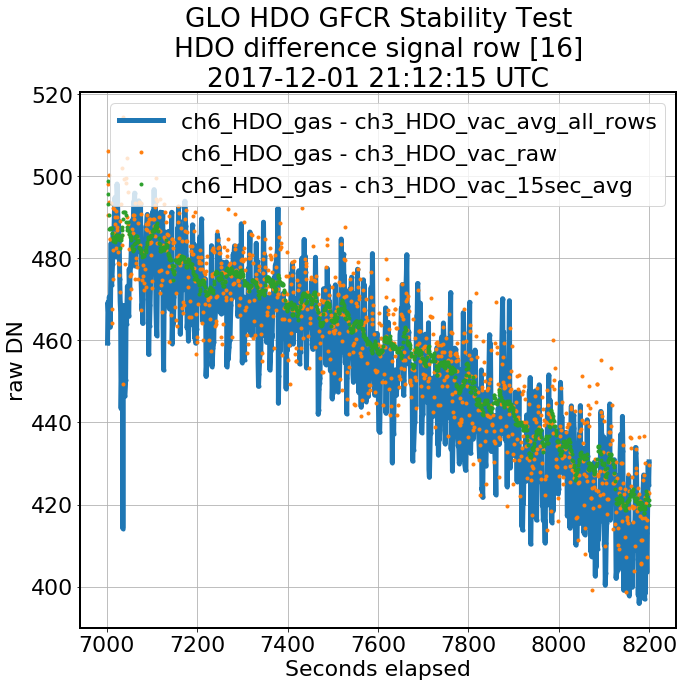

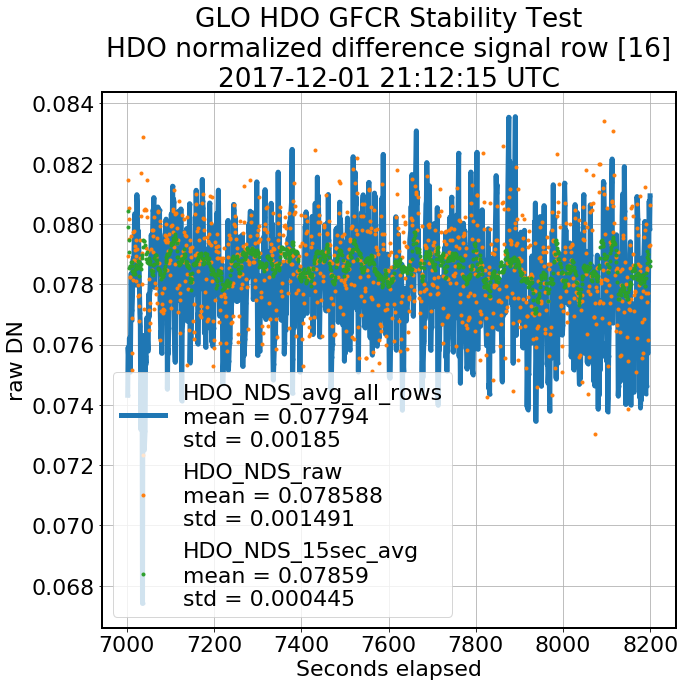

In [63]:
t_start = 7000
t_stop = 8200
roi1 = load_roi()
roi1_row=[16]

plt.figure(1)
roi_df_ch3 = roi1['ch3']
roi_df_ch3['elapsed'] = roi_df_ch3.index.to_datetime() - roi_df_ch3.index[0]
roi_df_ch3.elapsed = roi_df_ch3.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df_ch3.elapsed > t_start) & (roi_df_ch3.elapsed < t_stop)
roi_df_ch3 = roi_df_ch3.loc[mask,:]

roi_df_ch6 = roi1['ch6']
roi_df_ch6['elapsed'] = roi_df_ch6.index.to_datetime() - roi_df_ch6.index[0]
roi_df_ch6.elapsed = roi_df_ch6.elapsed.astype('timedelta64[ms]').divide(1000.0)
mask = (roi_df_ch6.elapsed > t_start) & (roi_df_ch6.elapsed < t_stop)
roi_df_ch6 = roi_df_ch6.loc[mask,:]
plt.plot(roi_df_ch3.elapsed,roi_df_ch6.iloc[:,np.arange(32)].mean(axis=1)-roi_df_ch3.iloc[:,np.arange(32)].mean(axis=1),'o-',label='ch6_HDO_gas - ch3_HDO_vac_avg_all_rows')
plt.xlabel('Seconds elapsed')

plot_roi(roi1['ch6']-roi1['ch3'],t_start,t_stop,leg='ch6_HDO_gas - ch3_HDO_vac_raw',roi1_row=roi1_row)
plot_roi(roi1['ch6']-roi1['ch3'],t_start,t_stop,roll_win=15,leg='ch6_HDO_gas - ch3_HDO_vac_15sec_avg',roi1_row=roi1_row)
plt.title('GLO HDO GFCR Stability Test\nHDO difference signal row '+str(roi1_row[:])+'\n2017-12-01 21:12:15 UTC')

plt.figure(2)
mean_nds_all_rows = ((roi_df_ch6.iloc[:,np.arange(32)].mean(axis=1)-roi_df_ch3.iloc[:,np.arange(32)].mean(axis=1))/roi_df_ch6.iloc[:,np.arange(32)].mean(axis=1)).mean()
std_nds_all_rows = ((roi_df_ch6.iloc[:,np.arange(32)].mean(axis=1)-roi_df_ch3.iloc[:,np.arange(32)].mean(axis=1))/roi_df_ch6.iloc[:,np.arange(32)].mean(axis=1)).std()
plt.plot(roi_df_ch3.elapsed,(roi_df_ch6.iloc[:,np.arange(32)].mean(axis=1)-roi_df_ch3.iloc[:,np.arange(32)].mean(axis=1))/roi_df_ch6.iloc[:,np.arange(32)].mean(axis=1),'o-',label='HDO_NDS_avg_all_rows\nmean = '+str(round(mean_nds_all_rows,5))+'\nstd = '+str(round(std_nds_all_rows,5)))
plot_roi((roi1['ch6']-roi1['ch3'])/(roi1['ch6']),t_start,t_stop,leg='HDO_NDS_raw',stats=True,roi1_row=roi1_row)
plot_roi((roi1['ch6']-roi1['ch3'])/(roi1['ch6']),t_start,t_stop,roll_win=15,leg='HDO_NDS_15sec_avg',stats=True,roi1_row=roi1_row)
plt.title('GLO HDO GFCR Stability Test\nHDO normalized difference signal row '+str(roi1_row[:])+'\n2017-12-01 21:12:15 UTC')
